In [1]:
import pandas as pd
import plotly.express as px

# Post dataset

This dataset contains over 8600 rows of data.
Each row is a person’s:
1. Type (This persons 4 letter MBTI code/type)
2. A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

In [2]:
post = pd.read_csv('post/mbti_1.csv')
post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


1. The column `post` contains the last 50 things they have posted (eparated by "|||"). 
2. For further visualization and statistical processing, we need to split this column into several columns(each column contains exactly one post).
3. Note that some of the posts contains only a url link.

In [3]:
# Split the column `post` into 50 columns
post_idx = []
for i in range(50):
    post_idx.append('post'+str(i))
df = post
df = df.drop(df[df['posts'].str.contains('\|\|\|\|')].index)
df[post_idx] = df['posts'].str.split(pat='\|\|\|',expand=True).drop([1235]).drop(columns=[50])
df = df[["type"] + post_idx]
# df.to_csv('data/post/split.csv') 

In [5]:
# Statistics
avg_char = []
avg_word = []
url_num = []
idx = list(df.index)
for i in range(8675):
    if i not in idx:
        avg_word.append(0)
        avg_char.append(0)
        url_num.append(0)
        continue
    char_num = 0
    word_num = 0
    post = 0
    url = 0
    for j in range(50):
        if(df['post'+str(j)][i] != None):
            if('http' in str(df['post'+str(j)][i])):
                url += 1
            else:
                char_num += len(str(df['post'+str(j)][i]))
                word_num += len(str(df['post'+str(j)][i]).split())
                post += 1
    if(char_num ==0 and post == 0 ):
        avg_char.append(0)
        avg_word.append(0)
    else:
        avg_char.append(char_num / post)
        avg_word.append(word_num / post)
    url_num.append(url)
df['avg_char'] =  pd.DataFrame(avg_char)
df['avg_word'] =  pd.DataFrame(avg_word)
df['url_num'] =  pd.DataFrame(url_num)
df = df[["type"] + ['avg_char'] + ['avg_word'] +['url_num'] + post_idx]
# df.to_csv('data/post/split_statistics.csv') 
# df.info()

In [6]:
# More statistics
import numpy as np
type = list(df['type'])
avg = list(df['avg_char'])
url = list(df['url_num'])
word = list(df['avg_word'])

types = ['ESTJ','ESTP','ESFJ','ESFP','ENTJ','ENTP','ENFJ','ENFP','ISTJ','ISTP','ISFJ','ISFP','INTJ','INTP','INFJ','INFP']
avgs = list(np.zeros(16))
words = list(np.zeros(16))
urls = list(np.zeros(16))
count = list(np.zeros(16))
for i in range(8531):
    if type[i] in types:
        idx = types.index(type[i])
        count[idx] += 1
        avgs[idx] += avg[i]
        words[idx] += word[i]
        urls[idx] += url[i]

for i in range(len(types)):
    avgs[i] /= count[i]
    words[i] /= count[i]
    urls[i] /= count[i]


dict = {'type':types,'characters per comment':avgs, 'words per comment':words, 'url per comment':urls}

df_new = pd.DataFrame(data = dict)
df_new.info()
# df_new.to_csv('data/post/16statistics.csv') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   type                    16 non-null     object 
 1   characters per comment  16 non-null     float64
 2   words per comment       16 non-null     float64
 3   url per comment         16 non-null     float64
dtypes: float64(3), object(1)
memory usage: 640.0+ bytes


The figure below shows `words per comment`. We found that generally speaking, personalities with "I"(Introversion) actually has more words per comment.

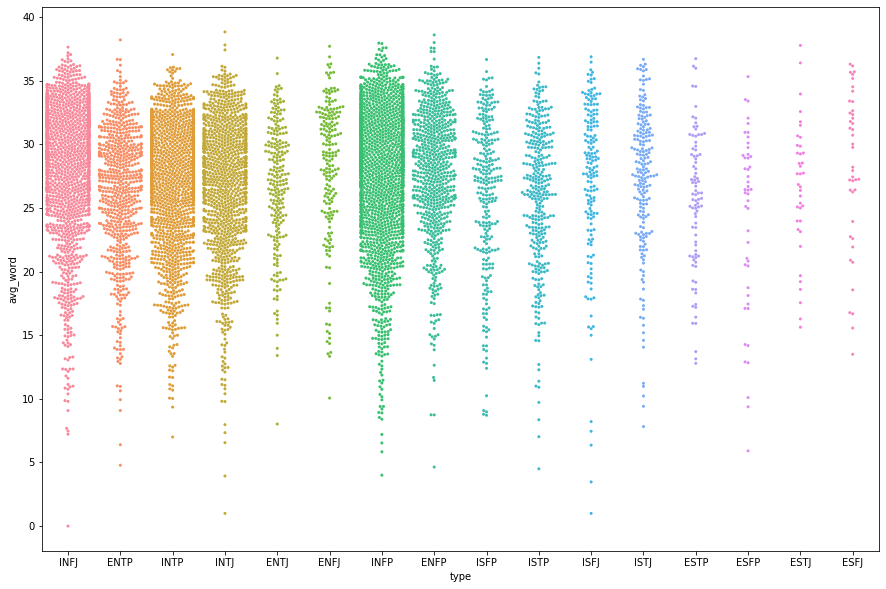

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
with warnings.catch_warnings(record=True):
    plt.figure(figsize=(15,10))
    sns.swarmplot("type", "avg_word", data=df,size=3)

The figure below shows `URLs per comment`. We found that generally speaking, personalities with "I"(Introversion) post more words per comment.

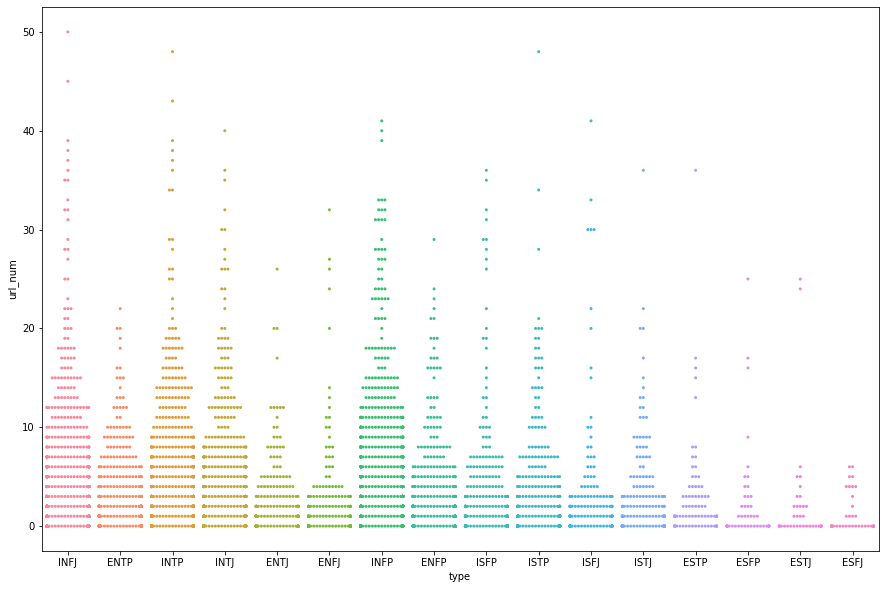

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
with warnings.catch_warnings(record=True):
    plt.figure(figsize=(15,10))
    sns.swarmplot("type", "url_num", data=df,size=3)

The figure below shows `average words and characters per comment` using histogram.

<Figure size 432x288 with 0 Axes>

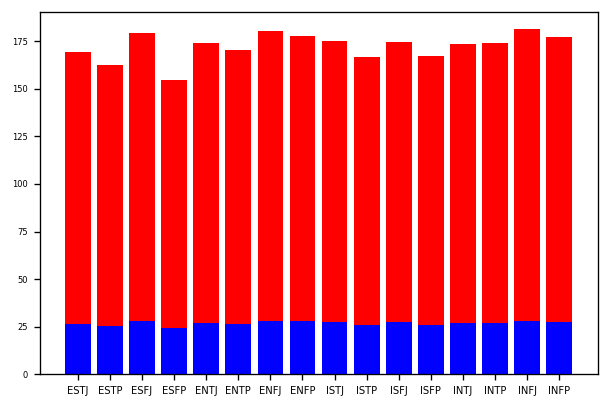

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(dpi=120)
plt.bar(range(len(types)), words, tick_label=types, color = 'b')
plt.bar(range(len(types)), avgs, bottom = words, tick_label=types, color = 'r')
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.show()

The figure below shows `URLs per comment` using histogram.

<Figure size 432x288 with 0 Axes>

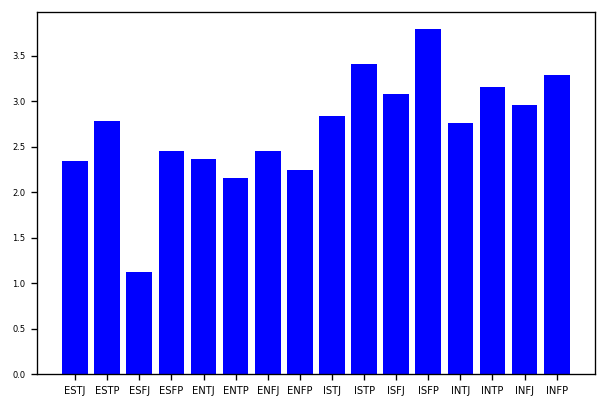

In [12]:
# average number of urls
plt.figure()
plt.figure(dpi=120)
plt.bar(range(len(types)), urls, tick_label=types, color = 'b')
plt.xticks(fontsize=6)
plt.yticks(fontsize=5)
plt.show()

### Word cloud

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [34]:
df_new2 = df

mask = df_new2['post0'].str.contains("http", na=False)
df_new2.loc[mask, 'post0'] = " "
mask2 = df_new2['post0'].isnull()
df_new2.loc[mask2, 'post0'] = " "

df_new2['all_in_words'] = df_new2['post0']
for i in range(1,50):
    mask = df_new2['post'+str(i)].str.contains("http", na=False)
    df_new2.loc[mask, 'post'+str(i)] = " "
    mask2 = df_new2['post'+str(i)].isnull()
    df_new2.loc[mask2, 'post'+str(i)] = " "
    
    df_new2['all_in_words'] +=  str(df_new2['post'+str(i)])

# print(post_idx)
df_new3 =  df_new2[["type"] + ['all_in_words']]
# df_new3.info()


In [59]:
df_new4 = df_new3.groupby(['type'], as_index=False).agg({'all_in_words': ' '.join})
print(df_new4['type'])


0     ENFJ
1     ENFP
2     ENTJ
3     ENTP
4     ESFJ
5     ESFP
6     ESTJ
7     ESTP
8     INFJ
9     INFP
10    INTJ
11    INTP
12    ISFJ
13    ISFP
14    ISTJ
15    ISTP
Name: type, dtype: object


In [36]:
import plotly.graph_objects as go

In [48]:
stop = "a’s	able	about	above	according accordingly	across	actually	after	afterwards again	against	ain’t	all	allow allows	almost	alone	along	already also	although	always	am	among amongst	an	and	another	any anybody	anyhow	anyone	anything	anyway anyways	anywhere	apart	appear	appreciate appropriate	are	aren’t	around	as aside	ask	asking	associated	at available	away	awfully	be	became because	become	becomes	becoming	been before	beforehand	behind	being	believe below	beside	besides	best	better between	beyond	both	brief	but by	c’mon	c’s	came	can can’t	cannot	cant	cause	causes certain	certainly	changes	clearly	co com	come	comes	concerning	consequently consider	considering	contain	containing	contains corresponding	could	couldn’t	course	currently definitely	described	despite	did	didn’t different	do	does	doesn’t	doing don’t	done	down	downwards	during each	edu	eg	eight	either else	elsewhere	enough	entirely	especially et	etc	even	ever	every everybody	everyone	everything	everywhere	ex exactly	example	except	far	few fifth	first	five	followed	following follows	for	former	formerly	forth four	from	further	furthermore	get gets	getting	given	gives	go goes	going	gone	got	gotten greetings	had	hadn’t	happens	hardly has	hasn’t	have	haven’t	having he	he’s	hello	help	hence her	here	here’s	hereafter	hereby herein	hereupon	hers	herself	hi him	himself	his	hither	hopefully how	howbeit	however	i’d	i’ll i’m	i’ve	ie	if	ignored immediate	in	inasmuch	inc	indeed indicate	indicated	indicates	inner	insofar instead	into	inward	is	isn’t it	it’d	it’ll	it’s	its itself	just	keep	keeps	kept know	known	knows	last	lately later	latter	latterly	least	less lest	let	let’s	like	liked likely	little	look	looking	looks ltd	mainly	many	may	maybe me	mean	meanwhile	merely	might more	moreover	most	mostly	much must	my	myself	name	namely nd	near	nearly	necessary	need needs	neither	never	nevertheless	new next	nine	no	nobody	non none	noone	nor	normally	not nothing	novel	now	nowhere	obviously of	off	often	oh	ok okay	old	on	once	one ones	only	onto	or	other others	otherwise	ought	our	ours ourselves	out	outside	over	overall own	particular	particularly	per	perhaps placed	please	plus	possible	presumably probably	provides	que	quite	qv rather	rd	re	really	reasonably regarding	regardless	regards	relatively	respectively right	said	same	saw	say saying	says	second	secondly	see seeing	seem	seemed	seeming	seems seen	self	selves	sensible	sent serious	seriously	seven	several	shall she	should	shouldn’t	since	six so	some	somebody	somehow	someone something	sometime	sometimes	somewhat	somewhere soon	sorry	specified	specify	specifying still	sub	such	sup	sure t’s	take	taken	tell	tends th	than	thank	thanks	thanx that	that’s	thats	the	their theirs	them	themselves	then	thence there	there’s	thereafter	thereby	therefore therein	theres	thereupon	these	they they’d	they’ll	they’re	they’ve	think third	this	thorough	thoroughly	those though	three	through	throughout	thru thus	to	together	too	took toward	towards	tried	tries	truly try	trying	twice	two	un under	unfortunately	unless	unlikely	until unto	up	upon	us	use used	useful	uses	using	usually value	various	very	via	viz vs	want	wants	was	wasn’t way	we	we’d	we’ll	we’re we’ve	welcome	well	went	were weren’t	what	what’s	whatever	when whence	whenever	where	where’s	whereafter whereas	whereby	wherein	whereupon	wherever whether	which	while	whither	who who’s	whoever	whole	whom	whose why	will	willing	wish	with within	without	won’t	wonder	would wouldn’t	yes	yet	you	you’d you’ll	you’re	you’ve	your	yours yourself	yourselves	zero "
add_stop_list = stop.split()


In [68]:
stopwords = set(STOPWORDS)
for i in range(len(add_stop_list)):
    stopwords.add(add_stop_list[i])
stopwords.add("say")
stopwords.add("think")
stopwords.add("go")
stopwords.add("going")
stopwords.add("know")
stopwords.add("come")
stopwords.add("people")
stopwords.add("book")
stopwords.add("feel")
stopwords.add("agree")
stopwords.add("book")
stopwords.add("point")
stopwords.add("post")
stopwords.add("thing")
stopwords.add("good")
stopwords.add("wow")
stopwords.add("time")


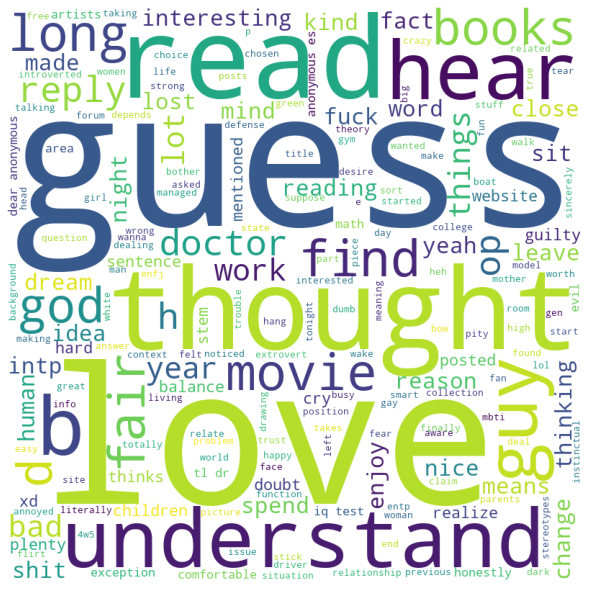

In [86]:
comment_words = ''

# choose index from 0 to 15
val = str(df_new4['all_in_words'][15]).replace("Name", " ")
val = str(val).replace("object0", " ")
val = str(val).replace("Length", " ")
val = str(val).replace("dtype", " ")
# val = df_new3['all_in_words'][0]
tokens = val.split()
for i in range(len(tokens)):
	tokens[i] = tokens[i].lower()
comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image					
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
fig = plt.axis("off")
plt.tight_layout(pad = 0)
# plt.show()
plt.savefig('ISTP.jpg')

# fig.write_html("test.html")
